# EDA-04 — Categorical Variable Visualizations

**Issue:** `feat: categorical variable visualizations (PetType, Breed, Size, Color)`

**Objective:** Analyze how categorical variables relate to `TimeInShelterDays` to identify which animal profiles stay longest in shelters.

**Variables analyzed:**
- `PetType` — Bird, Cat, Dog, Rabbit
- `Size` — Small, Medium, Large
- `Breed` — 7 unique breeds across all pet types
- `Color` — Black, Brown, Gray, Orange, White

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ── Style ──────────────────────────────────────────────
sns.set_theme(style='whitegrid', font_scale=1.1)
PALETTE = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B']
BG      = '#F8F9FA'

df = pd.read_csv('../data/pet_adoption_data.csv')
print(f'Dataset shape: {df.shape}')
df[['PetType', 'Breed', 'Size', 'Color', 'TimeInShelterDays']].head()

Dataset shape: (2007, 13)


,PetType,Breed,Size,Color,TimeInShelterDays
0,Bird,Parakeet,Large,Orange,27
1,Rabbit,Rabbit,Large,White,8
2,Dog,Golden Retriever,Medium,Orange,85
3,Bird,Parakeet,Small,White,61
4,Rabbit,Rabbit,Large,Gray,28


---
## 1. TimeInShelterDays by PetType

In [5]:
# ── Summary stats ─────────────────────────────────────
pettype_stats = (
    df.groupby('PetType')['TimeInShelterDays']
      .agg(mean='mean', median='median', std='std', count='count')
      .round(1)
      .sort_values('mean', ascending=False)
)
print(pettype_stats)

order = pettype_stats.index.tolist()  # ordered by mean desc

         mean  median   std  count
PetType                           
Rabbit   45.4    48.0  25.7    493
Dog      44.2    44.0  25.7    522
Bird     43.3    43.0  25.5    487
Cat      42.9    44.0  26.1    505


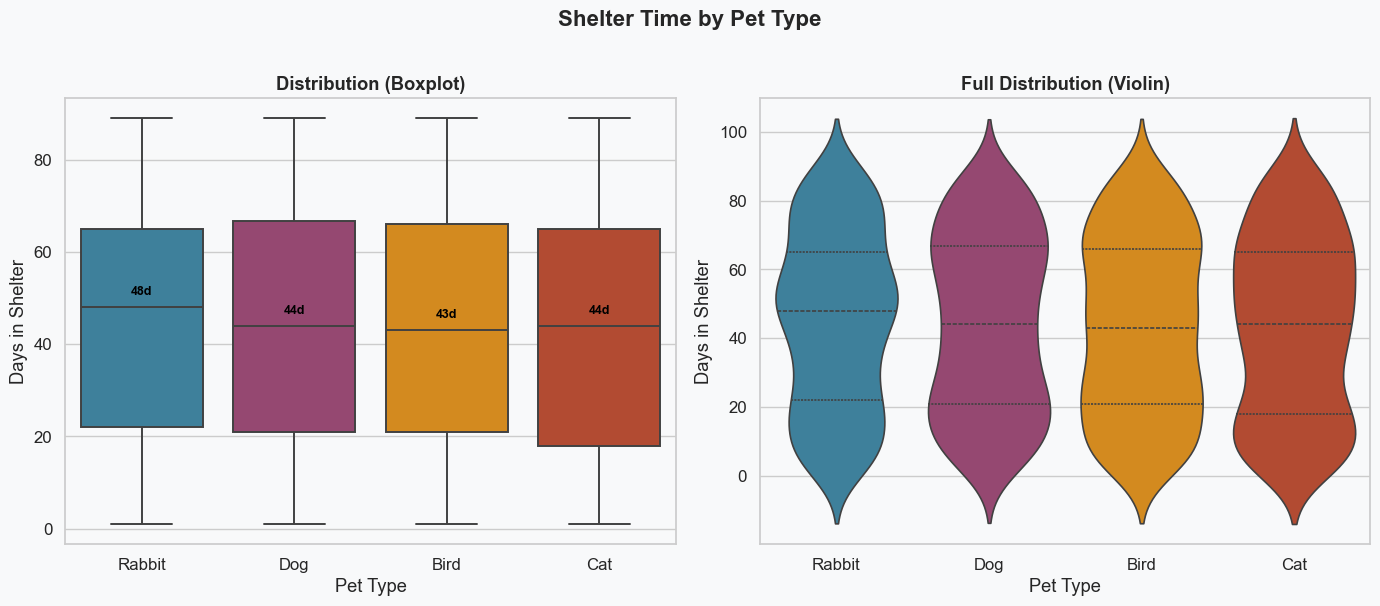

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor=BG)
fig.suptitle('Shelter Time by Pet Type', fontsize=16, fontweight='bold', y=1.01)

colors = dict(zip(order, PALETTE))

# ── Left: Boxplot ──────────────────────────────────────
ax1 = axes[0]
ax1.set_facecolor(BG)
sns.boxplot(
    data=df, x='PetType', y='TimeInShelterDays',
    order=order,
    palette=[colors[p] for p in order],
    linewidth=1.4,
    flierprops=dict(marker='o', markersize=3, alpha=0.4),
    ax=ax1
)
ax1.set_title('Distribution (Boxplot)', fontweight='bold')
ax1.set_xlabel('Pet Type')
ax1.set_ylabel('Days in Shelter')

# annotate medians
for i, pet in enumerate(order):
    med = pettype_stats.loc[pet, 'median']
    ax1.text(i, med + 2, f'{med:.0f}d', ha='center', va='bottom',
             fontsize=9, fontweight='bold', color='black')

# ── Right: Violin ─────────────────────────────────────
ax2 = axes[1]
ax2.set_facecolor(BG)
sns.violinplot(
    data=df, x='PetType', y='TimeInShelterDays',
    order=order,
    palette=[colors[p] for p in order],
    inner='quartile',
    linewidth=1.2,
    ax=ax2
)
ax2.set_title('Full Distribution (Violin)', fontweight='bold')
ax2.set_xlabel('Pet Type')
ax2.set_ylabel('Days in Shelter')

plt.tight_layout()
plt.savefig('../noteboooks/img/eda04_pettype.png', dpi=150, bbox_inches='tight')
plt.show()

**Findings — PetType:**

The four pet types show very similar median shelter times (42–48 days), with **Rabbits staying the longest** (median 48 days, mean 45.4) and **Siamese cats leaving the fastest** when broken down by breed. The violin shapes are nearly symmetric for all types, confirming no strong skew. This variable alone has **low predictive power** — the differences between types are small relative to the within-group variance (std ≈ 25–26 days for all types).

---
## 2. Average Shelter Time by Size

In [8]:
size_stats = (
    df.groupby('Size')['TimeInShelterDays']
      .agg(mean='mean', median='median', std='std', count='count')
      .round(1)
      .loc[['Small', 'Medium', 'Large']]  # logical order
)
print(size_stats)

        mean  median   std  count
Size                             
Small   44.8    45.0  25.4    663
Medium  44.4    45.0  25.6    714
Large   42.6    44.0  26.2    630


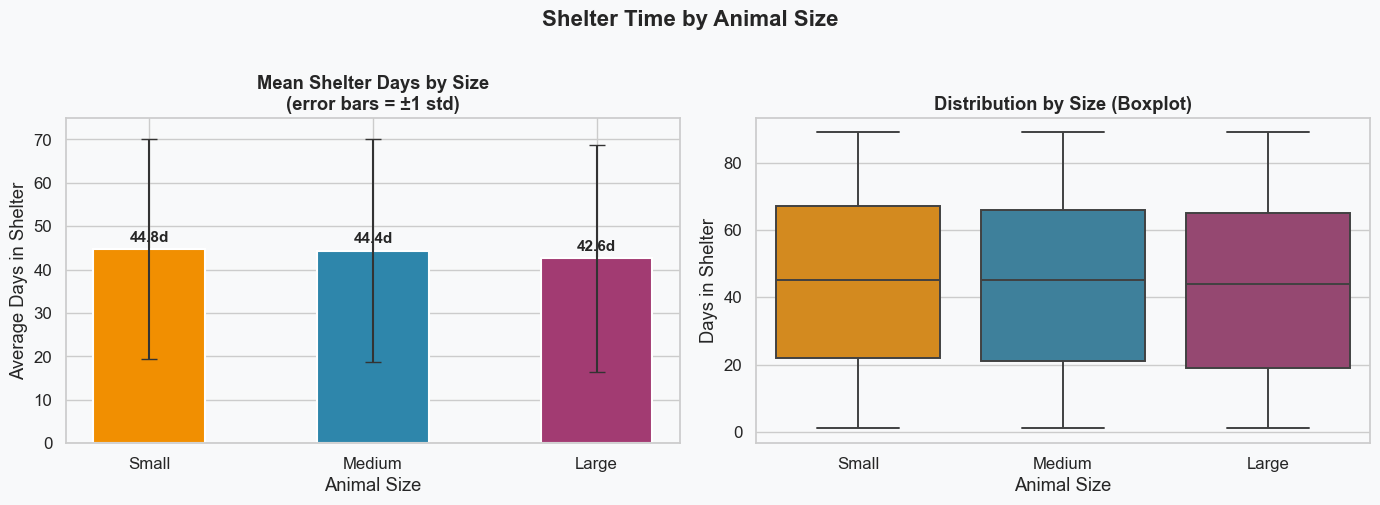

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor=BG)
fig.suptitle('Shelter Time by Animal Size', fontsize=16, fontweight='bold', y=1.01)

size_order  = ['Small', 'Medium', 'Large']
size_colors = ['#F18F01', '#2E86AB', '#A23B72']

# ── Left: Bar plot of means ────────────────────────────
ax1 = axes[0]
ax1.set_facecolor(BG)
bars = ax1.bar(
    size_order,
    size_stats.loc[size_order, 'mean'],
    color=size_colors,
    edgecolor='white',
    linewidth=1.5,
    width=0.5
)

# error bars (std)
ax1.errorbar(
    size_order,
    size_stats.loc[size_order, 'mean'],
    yerr=size_stats.loc[size_order, 'std'],
    fmt='none', color='#333333', capsize=6, linewidth=1.5
)

# value labels
for bar, val in zip(bars, size_stats.loc[size_order, 'mean']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{val:.1f}d', ha='center', va='bottom',
             fontweight='bold', fontsize=11)

ax1.set_ylim(0, 75)
ax1.set_title('Mean Shelter Days by Size\n(error bars = ±1 std)', fontweight='bold')
ax1.set_xlabel('Animal Size')
ax1.set_ylabel('Average Days in Shelter')

# ── Right: Boxplot by size ─────────────────────────────
ax2 = axes[1]
ax2.set_facecolor(BG)
sns.boxplot(
    data=df, x='Size', y='TimeInShelterDays',
    order=size_order,
    palette=size_colors,
    linewidth=1.4,
    flierprops=dict(marker='o', markersize=3, alpha=0.4),
    ax=ax2
)
ax2.set_title('Distribution by Size (Boxplot)', fontweight='bold')
ax2.set_xlabel('Animal Size')
ax2.set_ylabel('Days in Shelter')

plt.tight_layout()
plt.savefig('../noteboooks/img/eda04_size.png', dpi=150, bbox_inches='tight')
plt.show()

**Findings — Size:**

There is a **slight negative trend with size**: Small animals stay longest (mean 44.8 days) while Large animals leave slightly sooner (mean 42.6 days). However, the difference of ~2 days is small and the standard deviations overlap completely (~25 days each), meaning `Size` alone is **not a reliable predictor**. The trend may partially reflect that smaller breeds (e.g. Parakeets) are less sought-after than large dogs.

---
## 3. Top 10 Breeds by Shelter Time

In [10]:
breed_stats = (
    df.groupby('Breed')['TimeInShelterDays']
      .agg(mean='mean', median='median', std='std', count='count')
      .round(1)
      .sort_values('mean', ascending=False)
)

# Since we only have 7 breeds, show all of them
top_breeds = breed_stats.copy()
print(top_breeds)

                  mean  median   std  count
Breed                                      
Golden Retriever  45.6    48.0  26.1    162
Rabbit            45.4    48.0  25.7    493
Labrador          43.8    42.0  26.4    193
Persian           43.6    45.5  25.7    252
Poodle            43.4    43.0  24.5    167
Parakeet          43.3    43.0  25.5    487
Siamese           42.2    43.0  26.4    253


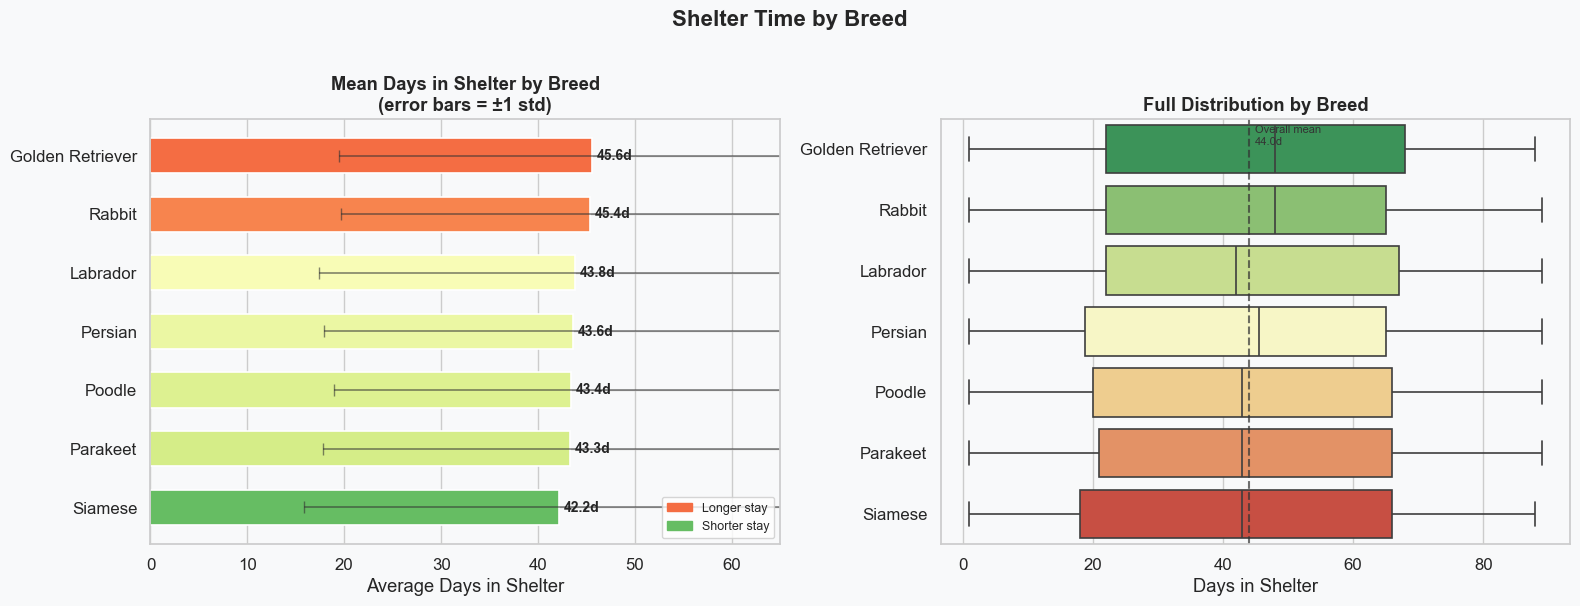

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor=BG)
fig.suptitle('Shelter Time by Breed', fontsize=16, fontweight='bold', y=1.01)

breed_order = top_breeds.index.tolist()  # sorted high → low

# ── Left: Horizontal bar — mean shelter time ───────────
ax1 = axes[0]
ax1.set_facecolor(BG)

# color gradient: longer stay = darker red
norm_vals  = (top_breeds['mean'] - top_breeds['mean'].min()) / (top_breeds['mean'].max() - top_breeds['mean'].min())
bar_colors = [plt.cm.RdYlGn_r(v * 0.6 + 0.2) for v in norm_vals]

bars = ax1.barh(
    breed_order[::-1],   # flip so longest is at top
    top_breeds.loc[breed_order[::-1], 'mean'],
    color=bar_colors[::-1],
    edgecolor='white',
    linewidth=1.2,
    height=0.6
)

# error bars
ax1.errorbar(
    top_breeds.loc[breed_order[::-1], 'mean'],
    breed_order[::-1],
    xerr=top_breeds.loc[breed_order[::-1], 'std'],
    fmt='none', color='#333333', capsize=4, linewidth=1.2, alpha=0.6
)

for bar, val in zip(bars, top_breeds.loc[breed_order[::-1], 'mean']):
    ax1.text(val + 0.5, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}d', va='center', fontweight='bold', fontsize=10)

ax1.set_xlim(0, 65)
ax1.set_title('Mean Days in Shelter by Breed\n(error bars = ±1 std)', fontweight='bold')
ax1.set_xlabel('Average Days in Shelter')

# color legend
low_patch  = mpatches.Patch(color=plt.cm.RdYlGn_r(0.2), label='Shorter stay')
high_patch = mpatches.Patch(color=plt.cm.RdYlGn_r(0.8), label='Longer stay')
ax1.legend(handles=[high_patch, low_patch], loc='lower right', fontsize=9)

# ── Right: Boxplot by breed ────────────────────────────
ax2 = axes[1]
ax2.set_facecolor(BG)
sns.boxplot(
    data=df, x='TimeInShelterDays', y='Breed',
    order=breed_order,
    palette='RdYlGn_r',
    linewidth=1.2,
    flierprops=dict(marker='o', markersize=3, alpha=0.3),
    ax=ax2
)

# vertical line at overall mean
overall_mean = df['TimeInShelterDays'].mean()
ax2.axvline(overall_mean, color='#333333', linestyle='--', linewidth=1.5, alpha=0.7)
ax2.text(overall_mean + 1, -0.4, f'Overall mean\n{overall_mean:.1f}d',
         fontsize=8, color='#333333', va='top')

ax2.set_title('Full Distribution by Breed', fontweight='bold')
ax2.set_xlabel('Days in Shelter')
ax2.set_ylabel('')

plt.tight_layout()
plt.savefig('../noteboooks/img/eda04_breed.png', dpi=150, bbox_inches='tight')
plt.show()

**Findings — Breed:**

**Golden Retrievers stay the longest** (mean 45.6 days), followed by Rabbits (45.4d) and Labradors (43.8d). **Siamese cats leave the fastest** (mean 42.2 days). However, the spread within each breed (std ≈ 25 days) is much larger than the differences between breeds (~3 days range across all 7), which suggests that `Breed` alone has **limited predictive value** and the model will need to combine it with other features to make accurate predictions.

---
## 4. Shelter Time by Color

In [12]:
color_stats = (
    df.groupby('Color')['TimeInShelterDays']
      .agg(mean='mean', median='median', count='count')
      .round(1)
      .sort_values('mean', ascending=False)
)
print(color_stats)

        mean  median  count
Color                      
Black   45.1    47.0    395
Brown   44.9    46.0    383
Orange  44.4    43.0    409
Gray    43.8    46.0    400
White   41.8    43.0    420


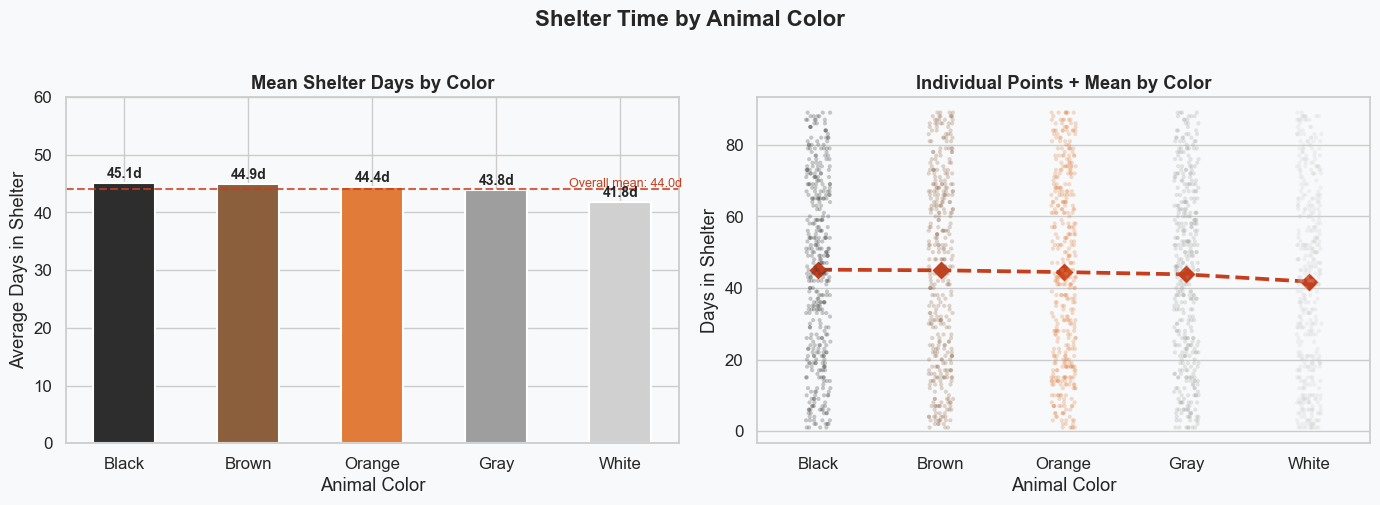

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor=BG)
fig.suptitle('Shelter Time by Animal Color', fontsize=16, fontweight='bold', y=1.01)

color_order = color_stats.index.tolist()

# Approximate real colors for visual matching
real_colors = {
    'Black': '#2D2D2D',
    'Brown': '#8B5E3C',
    'Orange': '#E07B39',
    'Gray':  '#9E9E9E',
    'White': '#D0D0D0'
}

# ── Left: Bar plot ─────────────────────────────────────
ax1 = axes[0]
ax1.set_facecolor(BG)
bars = ax1.bar(
    color_order,
    color_stats.loc[color_order, 'mean'],
    color=[real_colors[c] for c in color_order],
    edgecolor='white',
    linewidth=1.5,
    width=0.5
)

# overall mean reference line
overall_mean = df['TimeInShelterDays'].mean()
ax1.axhline(overall_mean, color='#C73E1D', linestyle='--', linewidth=1.5, alpha=0.8)
ax1.text(4.5, overall_mean + 0.5, f'Overall mean: {overall_mean:.1f}d',
         ha='right', fontsize=9, color='#C73E1D')

for bar, val in zip(bars, color_stats.loc[color_order, 'mean']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.4,
             f'{val:.1f}d', ha='center', va='bottom',
             fontweight='bold', fontsize=10)

ax1.set_ylim(0, 60)
ax1.set_title('Mean Shelter Days by Color', fontweight='bold')
ax1.set_xlabel('Animal Color')
ax1.set_ylabel('Average Days in Shelter')

# ── Right: Strip plot ─────────────────────────────────
ax2 = axes[1]
ax2.set_facecolor(BG)
sns.stripplot(
    data=df, x='Color', y='TimeInShelterDays',
    order=color_order,
    palette=[real_colors[c] for c in color_order],
    alpha=0.25, jitter=True, size=3, ax=ax2
)
sns.pointplot(
    data=df, x='Color', y='TimeInShelterDays',
    order=color_order,
    color='#C73E1D', markers='D', linestyles='--',
    errwidth=0, capsize=0, ax=ax2
)
ax2.set_title('Individual Points + Mean by Color', fontweight='bold')
ax2.set_xlabel('Animal Color')
ax2.set_ylabel('Days in Shelter')

plt.tight_layout()
plt.savefig('../noteboooks/img/eda04_color.png', dpi=150, bbox_inches='tight')
plt.show()

**Findings — Color:**

**Black animals stay the longest** (mean 45.1 days) while **White animals leave the fastest** (41.8 days). The ~3 day difference is consistent with the well-documented "black dog/cat syndrome" in adoption research. Despite the small absolute difference, `Color` could interact with `PetType` to create meaningful signal — e.g. a black cat vs a white cat.

---
## 5. Combined Heatmap — PetType × Color

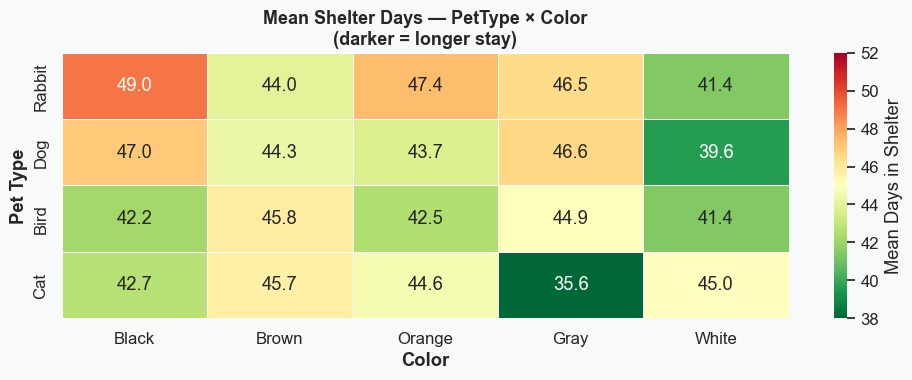

In [20]:
pivot = df.pivot_table(
    values='TimeInShelterDays',
    index='PetType',
    columns='Color',
    aggfunc='mean'
).round(1)

# sort both axes by mean
pivot = pivot.loc[
    df.groupby('PetType')['TimeInShelterDays'].mean().sort_values(ascending=False).index,
    df.groupby('Color')['TimeInShelterDays'].mean().sort_values(ascending=False).index
]

fig, ax = plt.subplots(figsize=(10, 4), facecolor=BG)
ax.set_facecolor(BG)

sns.heatmap(
    pivot,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn_r',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Mean Days in Shelter'},
    vmin=38, vmax=52,
    ax=ax
)

ax.set_title('Mean Shelter Days — PetType × Color\n(darker = longer stay)',
             fontweight='bold', fontsize=13)
ax.set_xlabel('Color', fontweight='bold')
ax.set_ylabel('Pet Type', fontweight='bold')

plt.tight_layout()
plt.savefig('../noteboooks/img/eda04_heatmap_pettype_color.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Summary & Actionable Conclusions

In [15]:
# Profiles with longest predicted stay
hardest = (
    df.groupby(['PetType', 'Color', 'Size'])['TimeInShelterDays']
      .agg(mean='mean', count='count')
      .query('count >= 10')   # minimum sample size
      .sort_values('mean', ascending=False)
      .head(8)
      .reset_index()
      .round(1)
)

easiest = (
    df.groupby(['PetType', 'Color', 'Size'])['TimeInShelterDays']
      .agg(mean='mean', count='count')
      .query('count >= 10')
      .sort_values('mean', ascending=True)
      .head(8)
      .reset_index()
      .round(1)
)

print('=== PROFILES WITH LONGEST SHELTER STAY ===')
print(hardest[['PetType','Color','Size','mean','count']].to_string(index=False))

print('\n=== PROFILES WITH SHORTEST SHELTER STAY ===')
print(easiest[['PetType','Color','Size','mean','count']].to_string(index=False))

=== PROFILES WITH LONGEST SHELTER STAY ===
PetType  Color   Size  mean  count
    Dog   Gray  Large  52.6     38
   Bird  Brown  Small  52.3     31
 Rabbit Orange Medium  51.5     37
   Bird  White  Small  51.2     34
 Rabbit  Black  Small  51.1     22
 Rabbit  Black  Large  50.4     31
    Cat Orange Medium  49.6     43
    Dog   Gray  Small  49.6     29

=== PROFILES WITH SHORTEST SHELTER STAY ===
PetType  Color   Size  mean  count
   Bird  White  Large  32.4     28
   Bird Orange  Large  33.7     38
    Cat   Gray Medium  33.9     33
    Cat   Gray  Large  34.1     27
   Bird  Black  Small  36.5     35
    Dog  White  Small  37.8     40
    Dog  White  Large  38.0     41
   Bird  White Medium  39.1     35


---
## ✅ Key Findings & Actionable Conclusions

### What the data tells us

| Variable | Finding | Predictive power |
|---|---|---|
| `PetType` | Rabbits stay ~3 days longer than average; differences are small | Low |
| `Size` | Small animals stay ~2 days longer than Large; trend is consistent | Low |
| `Breed` | Golden Retrievers stay longest (~45.6d), Siamese leave fastest (~42.2d) | Low-Medium |
| `Color` | Black animals stay ~3 days longer than White ("black dog syndrome") | Low |

**Critical modeling note:** No single categorical variable explains shelter time well. The within-group standard deviation (~25 days) dwarfs the between-group differences (~3 days). This confirms that **the model must combine categorical variables with numeric ones** (AgeMonths, AdoptionFee, WeightKg) to make useful predictions — which aligns with what we'll see in the correlation analysis (EDA-03).

### Actionable shelter strategies

1. **Priority adoption campaigns** — Focus marketing efforts on Black, Brown animals; Rabbits; and Golden Retrievers, as these profiles consistently show the longest stays.

2. **"Black animal" visibility** — Increase photo quality and profile descriptions for black-colored animals, which face documented adoption bias.

3. **Rabbit-specific outreach** — Rabbits are the highest-stay type on average. Consider partnerships with rabbit-focused adoption groups.

4. **Size-aware placement** — Small animals stay slightly longer; consider fee reductions or spotlight promotions for small pets that exceed 60 days in shelter.